In [1]:
import numpy as np
import cv2 as cv
import os

#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

from skimage import measure
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

In [2]:
def viewImageInWindow(image, name_of_window):
    cv.namedWindow(name_of_window, cv.WINDOW_NORMAL)
    cv.imshow(name_of_window, image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

def viewImageAndCoordInNotebook(img, coords, bounding=[], subplot="test"):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)
    #ax = fig.add_subplot(111)
    if len(bounding)!=0:
        rect = patches.Rectangle((bounding[0][0], bounding[0][1]), bounding[1], bounding[2], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    

In [3]:
# Фильтрация и бинаризация изображений

In [4]:
# Подготовка тестовых выборок

In [5]:
def load_images_from_folder(folder): 
    images = [] 
    for filename in os.listdir(folder): # читаю все предобратанные картинки с фигурами
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(cv.cvtColor(img, cv.COLOR_BGR2RGB)) #
    return images

imlist = load_images_from_folder('test_imgs/') # список изображений

13


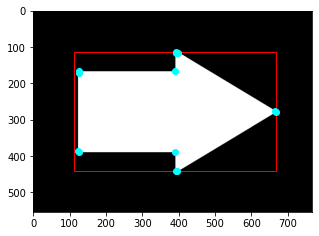

6


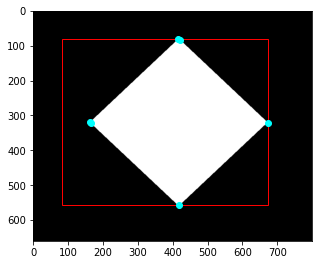

176


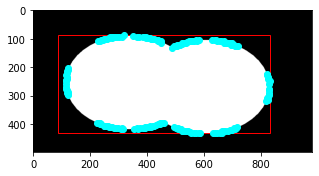

6


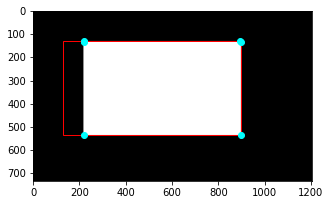

213


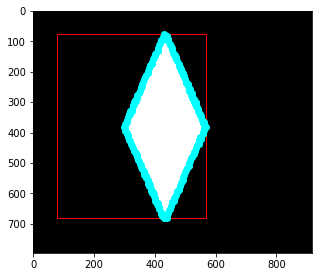

60


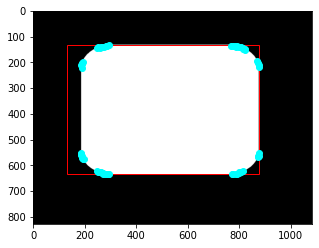

In [6]:
# пытаюсь выделить точки границы
coords = []
bound = []

# задача подобрать оптимальный шаг и трешхолд
def get_refer_coords(imlist):
    for img in imlist:
        #Убрать в продакшене
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # в серошкальный (почему-то не серошкальный выходит)
        ret, img = cv.threshold(img, 240 , 255, cv.CHAIN_APPROX_NONE) # бинаризируем (черно белый)

        output = img.copy()

        output = np.float32(output)
        dst = cv.cornerHarris(output,2,3,0.04) # выделяем угловые точки
        dst = cv.dilate(dst,None)
        ret, dst = cv.threshold(dst,0.001*dst.max(),255,0)
        dst = np.uint8(dst)

        coords = corner_peaks(dst, min_distance=3, threshold_rel=0.2)
        
        print(len(coords))
        #определяю угловые точки
        minX = coords[0][0]
        minY = coords[0][1]
        maxX = coords[0][0]
        maxY = coords[0][1]
        for coord in coords:
            if coord[1]<minX:
                minX = coord[1]
            if coord[0]<minY:
                minY = coord[0]
            if coord[1]>maxX:
                maxX = coord[1]
            if coord[0]>maxY:
                maxY = coord[0]
        bound = [[minX, minY], maxX-minX, maxY-minY]
    
        viewImageAndCoordInNotebook(img, coords, bound)
    return {"coords":coords, "bound":bound}

# кол-во элементов в массиве соответствует числу Классов в обучающей выборке
coords, bound = get_refer_coords(imlist)

In [7]:
# Обучение классификатором

In [8]:
# Bounding найденного